<a href="https://colab.research.google.com/github/SakshiGehani/J015_NLPassignments/blob/ClassWork/CW6_CountVectorizer_J015_24_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sklearn pipeline -- Count Vectorizer, RF/GBM/XGBoost

In [0]:
import pandas as pd

In [0]:
## Twitter dataset
df = pd.read_csv("https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv")
df.head()

,Topic,Sentiment,TweetId,TweetDate,TweetText
0,apple,positive,126415614616154112,Tue Oct 18 21:53:25 +0000 2011,Now all @Apple has to do is get swype on the i...
1,apple,positive,126404574230740992,Tue Oct 18 21:09:33 +0000 2011,@Apple will be adding more carrier support to ...
2,apple,positive,126402758403305474,Tue Oct 18 21:02:20 +0000 2011,Hilarious @youtube video - guy does a duet wit...
3,apple,positive,126397179614068736,Tue Oct 18 20:40:10 +0000 2011,@RIM you made it too easy for me to switch to ...
4,apple,positive,126395626979196928,Tue Oct 18 20:34:00 +0000 2011,I just realized that the reason I got into twi...


In [0]:
#Removing irrelevant sentiments
df = df[df['Sentiment']!='irrelevant']

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import re
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
## Preprocessing data

stop_words = set(stopwords.words('english'))
words = set(nltk.corpus.words.words())
def preprocess(sen):
  sen = sen.lower()
  no_punc = sen.translate(sen.maketrans('', '', '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'))
  filtered = re.sub(r'(\s)@\w+', r'\1', no_punc)
  filtered = re.sub(r'(\s)#\w+', r'\1', filtered)
  filtered = filtered.translate(filtered.maketrans('', '', '#@0123456789'))
  tokens = word_tokenize(filtered)
  no_stop_words = [w for w in tokens if not w in stop_words]     # eliminate stop words
  sent = " ".join(w for w in no_stop_words)
  sent = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
            if w.lower() in words or not w.isalpha())
  
  return sent


In [0]:
corpus=df.TweetText.apply(preprocess)
print(corpus)

0                                              get crack
1                                  apple carrier support
2       hilarious video guy duet pretty much love affair
3                            rim made easy switch see ya
4                              reason got twitter thanks
                              ...                       
4537                   modern day autograph like way put
4538                                   ways use business
4539                          log think bout going sleep
4540                                 dumb dont like hush
4541           almost bong rip bowl time space continuum
Name: TweetText, Length: 3424, dtype: object


In [0]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['abandoned', 'abbas', 'ability', 'able', 'absolutely', 'abstract', 'academy', 'accelerate', 'accelerated', 'acceleration', 'accent', 'acceptable', 'access', 'accidently', 'according', 'account', 'accused', 'acquire', 'acquisition', 'across', 'acting', 'action', 'active', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addict', 'addicted', 'additional', 'address', 'administrator', 'admirably', 'admit', 'adobe', 'adopted', 'adoption', 'adult', 'advance', 'advanced', 'advantage', 'advertise', 'advertisement', 'advertising', 'advisor', 'affair', 'afford', 'after', 'afterthought', 'age', 'agency', 'agenda', 'aggressive', 'ago', 'agree', 'agricole', 'ah', 'ahead', 'ai', 'ailing', 'aim', 'aint', 'air', 'airdrop', 'aka', 'ala', 'alamo', 'alarm', 'albatross', 'album', 'alcohol', 'alert', 'algorithm', 'alive', 'allow', 'almost', 'alone', 'along', 'alongside', 'already', 'alright', 'also', 'alternate', 'alternative', 'although', 'alto', 'always', 'amateur', 'amazed', 'amazing', 'amongst

In [0]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
#converting the count vectorizer array into input dataframe

X = pd.DataFrame(X.toarray(), columns=(vectorizer.get_feature_names()))

In [0]:
X.columns

Index(['abandoned', 'abbas', 'ability', 'able', 'absolutely', 'abstract',
       'academy', 'accelerate', 'accelerated', 'acceleration',
       ...
       'yet', 'yo', 'you', 'youd', 'young', 'youve', 'yr', 'yummy', 'zero',
       'zoom'],
      dtype='object', length=2796)

In [0]:
from sklearn.model_selection import train_test_split as tts
# splitting into train-test
X_train, X_test, y_train, y_test = tts(X, df['Sentiment'], test_size=0.3, random_state=42)

## Random Forest model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

params = {'max_depth': [10, 20, 30, None], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': range(10,50,10)}
 
gs_rf = GridSearchCV(estimator = rf, param_grid = params, cv = 5, n_jobs = 15, verbose = 1)

In [0]:
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    4.8s
[Parallel(n_jobs=15)]: Done 170 tasks      | elapsed:   38.5s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:  2.2min
[Parallel(n_jobs=15)]: Done 720 out of 720 | elapsed:  6.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(gs_rf.predict(X_test),y_test))    # classification report for random forest model

              precision    recall  f1-score   support

    negative       0.27      0.65      0.38        82
     neutral       0.93      0.74      0.82       858
    positive       0.30      0.52      0.38        88

    accuracy                           0.71      1028
   macro avg       0.50      0.64      0.53      1028
weighted avg       0.82      0.71      0.75      1028



The extremely high precision and recall values for 'neutral' class show that the model is quite efficient in predicting the 'neutral' tweets. At the same time the unusually low precision values of 'negative' and 'positive' classes show that there is a class imbalance and these classes are not well represented in the dataset.

In [0]:
print(confusion_matrix(gs_rf.predict(X_test), y_test))

[[ 53  23   6]
 [123 633 102]
 [ 18  24  46]]


In [0]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

## ROC Curve and AUC Score



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [0]:
probs = gs_rf.predict_proba(X_test)

In [0]:
probs = probs[:, 1]

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_testNew = lb.fit_transform(y_test)

In [0]:
y_testNew = y_testNew[:, 1]

In [0]:
auc = roc_auc_score(y_testNew, probs)
print('AUC: %.2f' % auc)

AUC: 0.76


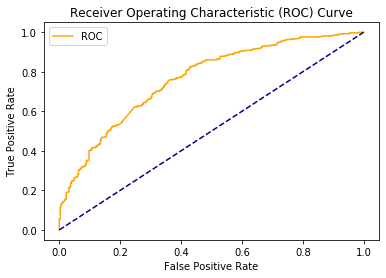

In [0]:
fpr, tpr, thresholds = roc_curve(y_testNew, probs)
plot_roc_curve(fpr, tpr)

The above ROC curve is for "negative" sentiment class. The AUC score is 0.76 or 76%. It means that the Random Forest model predicts the "negative" class with a 76% accuracy. Here, the TPR and FPR pertaining to only the "negative" class have been taken into account, so we get an approximate measure of how good the model works for the data.

## Light GBM model

In [0]:
!pip install lightgbm
import lightgbm as lgb

In [0]:
params = {
    "objective" : "multiclass",
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':3,
    'learning_rate':0.01,
    'max_depth': 7,
    'num_leaves': 127,
    'feature_fraction': 0.4,
    'bagging_freq': 10,
    'num_iterations':1000 ,
    'max_bin' : 32}

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
train = lgb.Dataset(X_train, le.fit_transform(y_train))

lgb_model = lgb.train(params, train, 100)

pred = lgb_model.predict(X_test)
best_pred = [np.argmax(line) for line in pred]

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [0]:
np.bincount((le.fit_transform(y_train)))

array([ 378, 1653,  365])

In [0]:
print(classification_report(le.inverse_transform(best_pred),y_test))     # classification report for lgb model

              precision    recall  f1-score   support

    negative       0.06      0.50      0.10        22
     neutral       0.96      0.68      0.80       968
    positive       0.10      0.42      0.17        38

    accuracy                           0.66      1028
   macro avg       0.38      0.53      0.35      1028
weighted avg       0.91      0.66      0.76      1028



The extremely high precision and recall values for 'neutral' class show that the model is quite efficient in predicting the 'neutral' tweets. At the same time the unusually low precision values of 'negative' and 'positive' classes show that there is a class imbalance and these classes are not well represented in the dataset.

Also the accuracy is 66% i.e. less than what we get with the RF model.

In [0]:
#ROC AUC score
#Defining a function that can find the roc auc score for multiple classes
def multiclass_roc_auc_score(y_pred, y_test, average='macro'):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_pred, y_test, average=average)

multiclass_roc_auc_score(le.inverse_transform(best_pred), y_test)

0.6462393489817463

In [0]:
np.bincount((best_pred))

array([ 22, 968,  38])

In [0]:
## defining a function that would find the results at different given thresholds
def threshold(arr,thresh):
  a = []
  for i in range(len(arr)):
    if max(arr[i])>thresh:
      a.append(np.argmax(arr[i]))
    else:
      a.append(2)
  return a

In [0]:
###for lgbm
print("\n 0.6 Threshold for lgbm : \n",classification_report(le.inverse_transform(threshold(pred, 0.6)), y_test))
print("ROC AUC Score = ", multiclass_roc_auc_score(le.inverse_transform(threshold(pred, 0.6)), y_test))
print("\n 0.7 Threshold for lgbm : \n",classification_report(le.inverse_transform(threshold(pred, 0.7)), y_test))
print("\n 0.8 Threshold for lgbm : \n",classification_report(le.inverse_transform(threshold(pred, 0.8)), y_test))


 0.6 Threshold for lgbm : 
               precision    recall  f1-score   support

    negative       0.01      0.50      0.01         2
     neutral       0.88      0.72      0.79       828
    positive       0.32      0.25      0.28       198

    accuracy                           0.63      1028
   macro avg       0.40      0.49      0.36      1028
weighted avg       0.77      0.63      0.69      1028

ROC AUC Score =  0.6210764325669024

 0.7 Threshold for lgbm : 
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.75      0.74      0.75       689
    positive       0.50      0.23      0.31       339

    accuracy                           0.57      1028
   macro avg       0.42      0.32      0.35      1028
weighted avg       0.67      0.57      0.60      1028


 0.8 Threshold for lgbm : 
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     n

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here, we can clearly see that for the LGM model the accuracy goes on decreasing as we increase the threshold -- 66% for 0.5, 63% for 0.6, 57% for 0.7 and finally 24% for 0.8 cut-off. 

Also the simultaneous decrease in the Recall values for the two classes other than the 'neutral' class clearly shows a class imbalance in the data. These classes are not as well represented in the dataset as the 'neutral' class. 

In [0]:
###For rf
rf_probs = gs_rf.predict_proba(X_test)
print("\n Default threshold for rf : \n", classification_report(gs_rf.predict(X_test),y_test))
print("ROC AUC Score = ", multiclass_roc_auc_score(gs_rf.predict(X_test), y_test))
print("\n 0.6 threshold for rf : \n",classification_report(le.inverse_transform(threshold(rf_probs, 0.6)), y_test))
print("ROC AUC Score = ", multiclass_roc_auc_score(le.inverse_transform(threshold(rf_probs, 0.6)), y_test))
print("\n 0.7 threshold for rf : \n",classification_report(le.inverse_transform(threshold(rf_probs, 0.7)), y_test))
print("\n 0.8 threshold for rf : \n",classification_report(le.inverse_transform(threshold(rf_probs, 0.8)), y_test))


 Default threshold for rf : 
               precision    recall  f1-score   support

    negative       0.27      0.65      0.38        82
     neutral       0.93      0.74      0.82       858
    positive       0.30      0.52      0.38        88

    accuracy                           0.71      1028
   macro avg       0.50      0.64      0.53      1028
weighted avg       0.82      0.71      0.75      1028

ROC AUC Score =  0.7277363571424603

 0.6 threshold for rf : 
               precision    recall  f1-score   support

    negative       0.14      0.73      0.23        37
     neutral       0.81      0.78      0.79       701
    positive       0.50      0.27      0.35       290

    accuracy                           0.63      1028
   macro avg       0.48      0.59      0.46      1028
weighted avg       0.70      0.63      0.65      1028

ROC AUC Score =  0.6834108206713405

 0.7 threshold for rf : 
               precision    recall  f1-score   support

    negative       0.10   

Here, we can clearly see that for the RF model the accuracy goes on decreasing as we increase the threshold -- 73%% for 0.5, 63% for 0.6, 57% for 0.7 and finally 47%% for 0.8 cut-off. [The accuracy the RF model gives for thresholds 0.6 and 0.7 is same as the one we get with the LGM model.]


Also there is a simultaneous decrease in the Recall value and increase in the 
Precision value for the 'positive' class and vice versa for the 'negative' class.

## XG Boost model

In [0]:
!pip install xgboost

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# make predictions for test data
xg_pred = xgb.predict(X_test)
'''#predictions = [round(value) for value in xg_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))'''

'#predictions = [round(value) for value in xg_pred]\n# evaluate predictions\naccuracy = accuracy_score(y_test, predictions)\nprint("Accuracy: %.2f%%" % (accuracy * 100.0))'

In [0]:
xg_probs = xgb.predict_proba(X_test)
print("\n Default threshold for xgb : \n", classification_report(xg_pred, y_test))
print("ROC AUC Score = ", multiclass_roc_auc_score(xg_pred, y_test))
print("\n 0.6 threshold for xgb : \n",classification_report(le.inverse_transform(threshold(xg_probs, 0.6)), y_test))
print("ROC AUC Score = ", multiclass_roc_auc_score(le.inverse_transform(threshold(xg_probs, 0.6)), y_test))
print("\n 0.7 threshold for xgb : \n",classification_report(le.inverse_transform(threshold(xg_probs, 0.7)), y_test))
print("\n 0.8 threshold for xgb : \n",classification_report(le.inverse_transform(threshold(xg_probs, 0.8)), y_test))


 Default threshold for xgb : 
               precision    recall  f1-score   support

    negative       0.12      0.74      0.20        31
     neutral       0.99      0.68      0.81       979
    positive       0.06      0.56      0.12        18

    accuracy                           0.68      1028
   macro avg       0.39      0.66      0.38      1028
weighted avg       0.94      0.68      0.78      1028

ROC AUC Score =  0.7439487356140235

 0.6 threshold for xgb : 
               precision    recall  f1-score   support

    negative       0.06      0.79      0.11        14
     neutral       0.96      0.72      0.82       902
    positive       0.25      0.34      0.29       112

    accuracy                           0.68      1028
   macro avg       0.42      0.62      0.40      1028
weighted avg       0.87      0.68      0.75      1028

ROC AUC Score =  0.7167357795184343

 0.7 threshold for xgb : 
               precision    recall  f1-score   support

    negative       0.04

Here, we can clearly see that for the XGBoost model the accuracy goes on decreasing as we increase the threshold -- 68%% for 0.5, 68% for 0.6, 61% for 0.7 and finally 17%% for 0.8 cut-off. Thus we see that it decreases quite slowly initially till 0.7 cut-off and then suddenly comes down to 17% at 80% cut-off.


Also there is a simultaneous increase in the Recall value and decrease in the 
Precision value for the 'negative' class and vice versa for the other two classes. 

The extremely high precision value of 0.99 for 'positive' class when keeping the cut-off at 0.8, clearly shows a case of over-fitting in the train data that leads to a reduced accuracy.